In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import copy
import utils

In [2]:
tracks = utils.load('fma_metadata/tracks.csv')
genres = utils.load('fma_metadata/genres.csv')
features = utils.load('fma_metadata/features.csv')
echonest = utils.load('fma_metadata/echonest.csv')

In [3]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [25]:
tracks["track", "date_recorded"]

track_id
2        2008-11-26
3        2008-11-26
5        2008-11-26
10       2008-11-26
20       2008-01-01
            ...    
155316          NaT
155317          NaT
155318          NaT
155319          NaT
155320          NaT
Name: (track, date_recorded), Length: 106574, dtype: datetime64[ns]

In [4]:
features.shape

(106574, 518)

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_80440/1350502230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tracks["track"].groupby("genre_top").size().plot(kind="pie", autopct='%1.1f%%', legend=True, textprops={'fontsize': 14}, pctdistance=0.75,


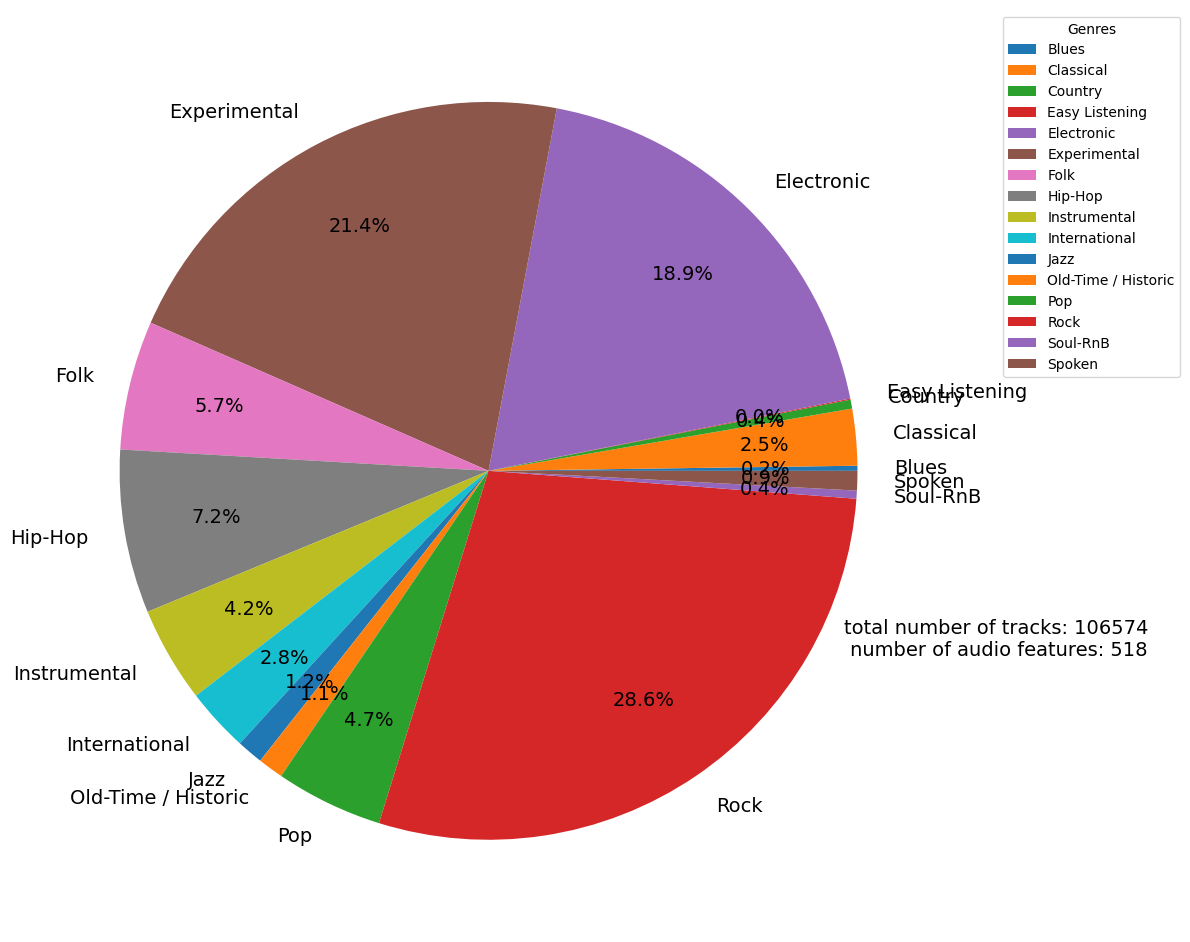

In [5]:
plt.figure(figsize=(12, 16))
tracks["track"].groupby("genre_top").size().plot(kind="pie", autopct='%1.1f%%', legend=True, textprops={'fontsize': 14}, pctdistance=0.75,
                                                 labeldistance=1.1)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.text(1.375, -0.5, "total number of tracks: %d\n number of audio features: %d" %(tracks.shape[0], features.shape[1]), fontsize=14, ha='center')

plt.tight_layout()  # Ensures everything fits without overlapping
plt.show()

In [6]:
features.columns = [' '.join(col) for col in features.columns]
features = features.reset_index()
features = features.drop(columns="track_id")

In [ ]:
from sklearn.decomposition import PCA
nc=20
pca = PCA(n_components=nc)
transformed_features = pca.fit_transform(features)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

518
[6.56309213e+05 4.73980887e+05 1.98481172e+05 1.54208929e+05
 1.33740896e+05 8.24311187e+04 7.07620888e+04 6.12822819e+04
 5.43604191e+04 4.95744211e+04 4.59543965e+04 3.87466842e+04
 2.85844683e+04 2.60026716e+04 2.35934305e+04 1.85426155e+04
 1.71129010e+04 1.62652703e+04 1.57329280e+04 1.53512985e+04
 1.44088993e+04 1.31028723e+04 1.22078857e+04 1.13477521e+04
 1.12773424e+04 1.11479486e+04 1.06602121e+04 1.04049235e+04
 9.28831386e+03 9.11298479e+03 8.99456937e+03 7.90705125e+03
 7.71900649e+03 7.39155630e+03 6.91205359e+03 6.86210231e+03
 6.66048375e+03 6.40539990e+03 6.29509861e+03 5.95082106e+03
 5.92267615e+03 5.58229392e+03 5.47713621e+03 5.33896105e+03
 4.96990038e+03 4.81983514e+03 4.78442691e+03 4.75725967e+03
 4.60970201e+03 4.57148232e+03 4.50022697e+03 4.24137448e+03
 4.17706388e+03 3.80272784e+03 3.76711413e+03 3.74080787e+03
 3.68510476e+03 3.47474695e+03 3.35914822e+03 3.27926070e+03
 3.20843944e+03 3.15307182e+03 3.00249909e+03 2.88419217e+03
 2.83132511e+03 2.76

In [28]:
label = tracks["track", "genre_top"].reset_index()
label.columns = [''.join(col) for col in label.columns]
label = label.rename(columns={"trackgenre_top" : "genre"})
label = label.drop(columns="track_id")

In [ ]:
transformed_features = pd.DataFrame(data=transformed_features, columns=["pc%d" %i for i in range(1, nc+1)])

In [30]:
pca_df = pd.concat([transformed_features, label], axis=1)

In [31]:
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc510,pc511,pc512,pc513,pc514,pc515,pc516,pc517,pc518,genre
0,1454.916960,-306.092911,-71.329221,-451.735639,-318.251436,-185.114075,-86.295955,-122.699129,-32.764707,-19.819065,...,-0.001136,-0.002702,0.000595,-0.001623,0.000252,0.000453,0.000037,-0.000071,0.000099,Hip-Hop
1,2112.006942,573.436823,87.284532,-342.654073,-295.952680,-293.542882,-230.134415,35.844273,-13.829441,-20.228865,...,-0.000642,-0.001238,0.000897,0.000818,-0.000215,-0.000510,0.001045,-0.000887,-0.000751,Hip-Hop
2,834.260162,-34.211569,-13.311043,-377.407321,-324.251013,-29.846700,-37.378959,106.066616,152.499186,-43.683773,...,0.001709,0.001300,0.001810,-0.000054,0.001740,0.003256,-0.000145,0.000112,-0.000291,Hip-Hop
3,281.486794,722.298277,176.234670,-607.314170,140.753420,-143.618982,141.523235,-357.644344,-100.088024,-92.388832,...,-0.001857,-0.000905,-0.000411,-0.000743,0.000548,0.000650,0.001552,-0.001238,-0.000030,Pop
4,3104.408724,-616.657241,-170.734611,-353.261298,120.759723,739.041073,-150.847147,160.412915,-44.950610,61.015276,...,0.001000,-0.000262,0.000162,0.000599,-0.000731,0.000645,0.000121,-0.000010,0.000008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,-1058.973890,42.973794,-573.929079,-214.726864,32.043895,190.478977,27.579722,36.377630,-144.085339,-74.513568,...,0.003079,0.001091,-0.001544,-0.000463,0.001203,-0.000513,0.000697,-0.000062,-0.000666,Rock
106570,-1566.480936,-3002.074538,489.770714,98.203174,-159.230713,101.940052,221.809854,-49.759666,-64.962793,-52.570288,...,-0.002159,0.002256,0.001981,-0.000114,0.001556,-0.000498,0.000355,-0.000323,-0.000254,Rock
106571,-299.144805,-5.213534,-458.092823,-185.570783,121.334085,58.592569,-173.967723,130.327354,-104.658513,-47.298785,...,-0.001777,0.002089,-0.001187,0.001111,0.000682,0.000861,0.000185,0.000570,-0.000149,Rock
106572,-5.369701,-169.769330,-652.930778,107.578963,115.318066,251.204912,-19.083293,72.670694,-158.585887,-35.163059,...,-0.000441,0.000960,0.000172,-0.001260,-0.000834,0.000398,-0.000543,0.000065,0.000341,Rock


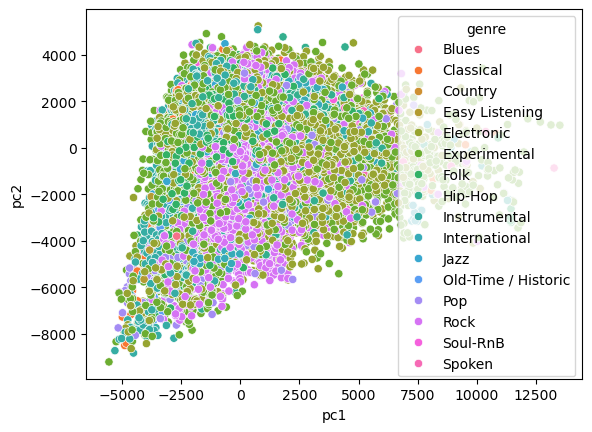

In [32]:
plt.figure()
sns.scatterplot(data=pca_df, x="pc1", y="pc2", hue="genre")
plt.show()

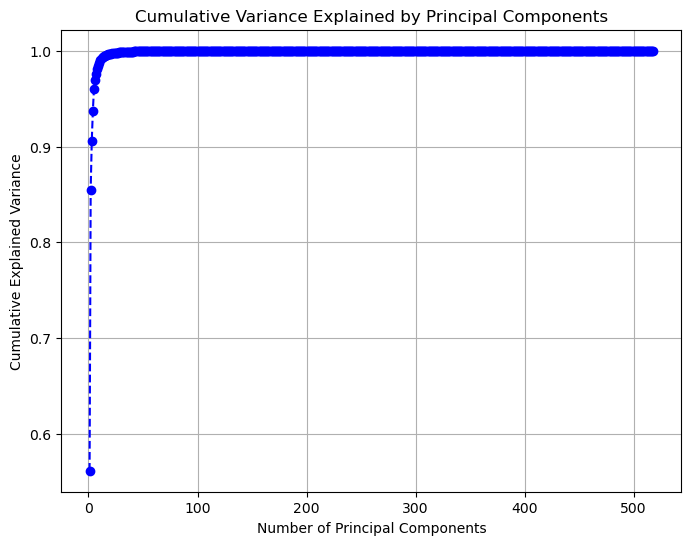

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, nc+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
# Show grid for better readability
plt.grid(True)
plt.show()